1. What is Boosting in Machine Learning? Explain how it improves weak
learners.

**Boosting** is an ensemble learning technique in **Machine Learning** that combines multiple weak learners to form a strong predictive model.

It works by training models **sequentially**. Each new weak learner focuses more on the mistakes made by the previous one. Misclassified data points are given higher weight, so the next model tries harder to predict them correctly.

By repeatedly correcting errors and combining all models (usually through weighted voting or summation), boosting reduces bias and improves overall accuracy.


2.  What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

The main difference is **how each model learns from previous errors**:

* **AdaBoost**: Trains models sequentially by **increasing the weights of misclassified data points**, so the next model focuses more on those hard examples.

* **Gradient Boosting**: Trains each new model to **predict the residual errors** (gradients of the loss function) of the previous model using gradient descent.


3. How does regularization help in XGBoost?

**XGBoost** uses regularization to prevent **overfitting** and improve model generalization.

### How regularization helps:

 **Penalizes model complexity** – Adds a penalty for large tree weights (L1 and L2 regularization).
 **Controls tree growth** – Limits overly deep or complex trees.
 **Reduces variance** – Prevents the model from fitting noise in the data.
 **Improves generalization** – Makes the model perform better on unseen data.


4. Why is CatBoost considered efficient for handling categorical data?

**CatBoost** is efficient for handling categorical data because it processes categorical features **internally**, without requiring manual encoding like one-hot encoding.

### Why it is efficient:

 **Automatic encoding** – Converts categorical features into numerical values using target-based encoding.
 **Ordered boosting** – Reduces target leakage when encoding categories. **Handles high-cardinality features well** – Works efficiently even with many unique category values.
 **Less preprocessing required** – Saves time and reduces errors.


5. What are some real-world applications where boosting techniques are
preferred over bagging methods?

Boosting techniques are preferred over bagging when **high accuracy and handling complex patterns** are more important than simple variance reduction.

### Real-world applications:

* **Fraud detection** – Detecting rare fraudulent transactions in banking and finance.
* **Credit scoring** – Predicting loan default risk.
* **Medical diagnosis** – Disease prediction from complex clinical data.
* **Customer churn prediction** – Identifying customers likely to leave.
* **Search ranking & recommendation systems** – Learning complex feature interactions.
* **Kaggle competitions** – Structured/tabular data problems often dominated by boosting models like **XGBoost**, **LightGBM**, and **CatBoost**.

### Why boosting is preferred:

* Focuses on hard-to-predict cases
* Reduces bias
* Captures complex feature relationships
* Often achieves higher predictive performance on structured data


In [1]:
# Write a Python program to:● Train an AdaBoost Classifier on the Breast Cancer dataset● Print the model accuracy.

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.9707602339181286


In [2]:
# Write a Python program to:● Train a Gradient Boosting Regressor on the California Housing dataset● Evaluate performance using R-squared score.

# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)

R-squared Score: 0.7803012822391022


In [3]:
# Write a Python program to:● Train an XGBoost Classifier on the Breast Cancer dataset● Tune the learning rate using GridSearchCV● Print the best parameters and accuracy.

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train models
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Model Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [14:05:56] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [14:05:58] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [14:05:59] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [14:05:59] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:

Best Parameters: {'learning_rate': 0.1}
Model Accuracy: 0.9590643274853801


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 9.7 MB/s eta 0:00:00


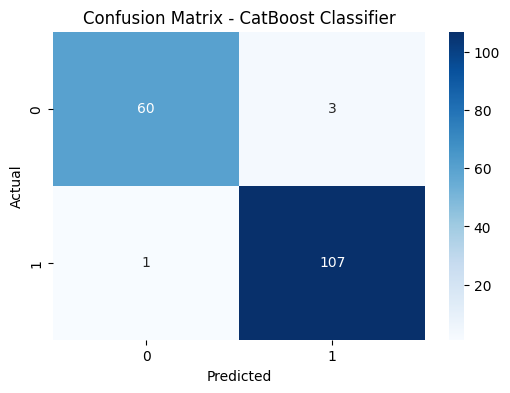

Confusion Matrix:
 [[ 60   3]
 [  1 107]]


In [8]:
# Write a Python program to:● Train a CatBoost Classifier● Plot the confusion matrix using seaborn.

# Install CatBoost if not already installed
!pip install catboost

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.05}

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       246
           1       0.73      0.81      0.77        54

    accuracy                           0.91       300
   macro avg       0.85      0.87      0.86       300
weighted avg       0.92      0.91      0.92       300

ROC-AUC Score: 0.95581150255947


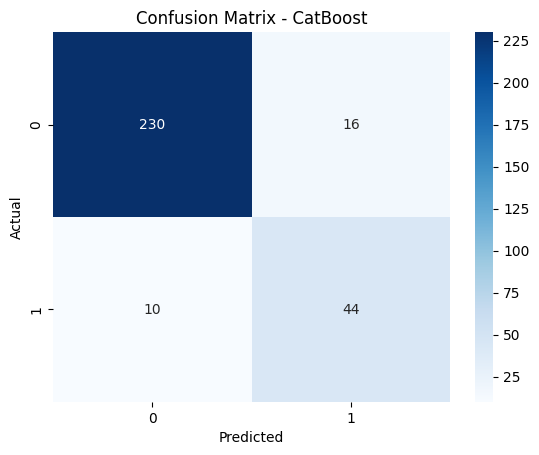

In [9]:
# You're working for a FinTech company trying to predict loan default usingcustomer demographics and transaction behavior.The dataset is imbalanced, contains missing values, and has both numeric andcategorical features.Describe your step-by-step data science pipeline using boosting techniques:● Data preprocessing & handling missing/categorical values● Choice between AdaBoost, XGBoost, or CatBoost● Hyperparameter tuning strategy● Evaluation metrics you'd choose and why● How the business would benefit from your model

# Import libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace with actual CSV)
# df = pd.read_csv('loan_data.csv')

# For demonstration, creating dummy data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6,
                           n_redundant=2, n_classes=2, weights=[0.8,0.2],
                           random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define CatBoost Classifier
model = CatBoostClassifier(
    verbose=0,
    random_state=42,
    eval_metric='AUC'
)

# Hyperparameter grid for tuning
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200]
}

# GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train_res, y_train_res)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Evaluation
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()